In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rqalpha.apis import *
from rqoptimizer import *
from rqoptimizer.utils import *
from rqdatac import *
from rqalpha_plus import run_func
import warnings
warnings.filterwarnings("ignore")
rqdatac.init()

Cannot initialize filter sz3: File not found


In [2]:
df_etf = pd.read_excel('../ETF-研究/etf_code.xlsx')
etf_code = df_etf.code.values.tolist()
etf_code = [str(code) for code in etf_code]
df_etf = all_instruments(type='ETF' , market = 'cn')
df_etf = df_etf[df_etf.trading_code.isin(etf_code)]

In [5]:
df_etf.set_index('order_book_id', inplace=True)

KeyError: "None of ['order_book_id'] are in the columns"

In [6]:
df_etf

,market_tplus,symbol,exchange,status,establishment_date,de_listed_date,type,trading_hours,abbrev_symbol,round_lot,listed_date,underlying_order_book_id,underlying_name,least_redeem,trading_code,board_type
order_book_id,,,,,,,,,,,,,,,,
159607.XSHE,1,嘉实中证海外中国互联网30ETF(QDII),XSHE,Active,2021-11-24,0000-00-00,ETF,"09:31-11:30,13:01-15:00",JSZZHWZGHLW30ETF(QDII),100,2021-12-02,930604.INDX,中证海外中国互联网30指数,1000000.0,159607,1
159611.XSHE,1,广发中证全指电力ETF,XSHE,Active,2021-12-29,0000-00-00,ETF,"09:31-11:30,13:01-15:00",GFZZQZDLETF,100,2022-01-07,H30199.XSHG,中证全指电力公用事业指数,800000.0,159611,1
159745.XSHE,1,国泰中证全指建筑材料ETF,XSHE,Active,2021-06-09,0000-00-00,ETF,"09:31-11:30,13:01-15:00",GTZZQZJZCLETF,100,2021-06-18,931009.INDX,中证全指建筑材料指数,1000000.0,159745,1
159825.XSHE,1,富国中证农业主题ETF,XSHE,Active,2020-12-10,0000-00-00,ETF,"09:31-11:30,13:01-15:00",FGZZNYZTETF,100,2020-12-29,000949.XSHG,中证农业主题指数,1000000.0,159825,1
159841.XSHE,1,天弘中证全指证券公司ETF,XSHE,Active,2021-01-28,0000-00-00,ETF,"09:31-11:30,13:01-15:00",THZZQZZQGSETF,100,2021-02-09,399975.XSHE,中证全指证券公司指数,600000.0,159841,1
159852.XSHE,1,嘉实中证软件服务ETF,XSHE,Active,2021-01-29,0000-00-00,ETF,"09:31-11:30,13:01-15:00",JSZZRJFWETF,100,2021-02-09,930601.INDX,中证软件服务指数,1000000.0,159852,1
159870.XSHE,1,化工ETF,XSHE,Active,2021-02-23,0000-00-00,ETF,"09:31-11:30,13:01-15:00",HGETF,100,2021-03-03,000813.XSHG,中证细分化工产业主题指数,500000.0,159870,1
159930.XSHE,1,汇添富中证能源ETF,XSHE,Active,2013-08-23,0000-00-00,ETF,"09:31-11:30,13:01-15:00",HTFZZNYETF,100,2013-09-16,000928.XSHG,中证能源指数,500000.0,159930,1
159958.XSHE,1,创业板ETF工银,XSHE,Active,2017-12-25,0000-00-00,ETF,"09:31-11:30,13:01-15:00",CYBETFGY,100,2018-01-19,399006.XSHE,创业板指数,700000.0,159958,1


In [8]:
df_etf.loc['159607.XSHE'].market_tplus

1

In [54]:
symbol = df_etf.order_book_id.values.tolist()
start = "2019-01-01"
end = "2023-12-31"
frequency = "1d"

In [55]:
df_price_entry = get_price(symbol, start, end, frequency)[['close']].unstack(level = 0)
df_price_entry.columns = df_price_entry.columns.droplevel(0)
pct_chg = df_price_entry.pct_change()
pct_chg

order_book_id,159607.XSHE,159611.XSHE,159745.XSHE,159825.XSHE,159841.XSHE,159852.XSHE,159870.XSHE,159930.XSHE,159958.XSHE,159996.XSHE,...,512480.XSHG,512660.XSHG,512800.XSHG,512980.XSHG,515170.XSHG,515210.XSHG,515880.XSHG,516110.XSHG,516160.XSHG,516970.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007911,-0.009818,NaN,...,NaN,0.024233,0.006826,0.001543,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020734,0.022663,NaN,...,NaN,0.018927,0.022599,0.024653,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007812,0.016620,NaN,...,NaN,0.038700,-0.003315,0.016541,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006202,-0.004087,NaN,...,NaN,-0.014903,-0.005543,-0.002959,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,0.018492,0.006977,-0.004992,0.000000,-0.011043,0.001355,0.003509,0.012924,0.001867,0.002901,...,-0.006289,0.013934,0.000968,-0.004225,0.008432,-0.002462,0.007035,0.010060,0.004902,-0.009250
2023-12-26,-0.004190,-0.004619,0.001672,-0.005602,-0.011166,-0.020298,0.000000,-0.012759,-0.009320,-0.012536,...,-0.024051,-0.010571,-0.003868,-0.011315,-0.006689,-0.005021,-0.022954,-0.009960,-0.003252,-0.007261
2023-12-27,0.018233,0.011601,-0.005008,0.022535,0.006274,0.000000,-0.003497,0.017771,0.000000,0.011719,...,0.014267,-0.001068,0.004854,-0.011445,0.001684,0.003336,0.006129,0.001006,-0.008157,0.007315


In [56]:
pct_chg.corr()

order_book_id,159607.XSHE,159611.XSHE,159745.XSHE,159825.XSHE,159841.XSHE,159852.XSHE,159870.XSHE,159930.XSHE,159958.XSHE,159996.XSHE,...,512480.XSHG,512660.XSHG,512800.XSHG,512980.XSHG,515170.XSHG,515210.XSHG,515880.XSHG,516110.XSHG,516160.XSHG,516970.XSHG
order_book_id,,,,,,,,,,,,,,,,,,,,,
159607.XSHE,1.000000,0.363542,0.543641,0.411039,0.483341,0.381112,0.497869,0.331658,0.526982,0.559209,...,0.309440,0.228570,0.508092,0.390899,0.602052,0.453620,0.341800,0.474679,0.388098,0.403131
159611.XSHE,0.363542,1.000000,0.426080,0.466758,0.419209,0.220692,0.475531,0.427955,0.422221,0.414847,...,0.227199,0.352453,0.412542,0.289627,0.271772,0.603971,0.302129,0.385062,0.415239,0.546087
159745.XSHE,0.543641,0.426080,1.000000,0.450996,0.604636,0.333957,0.562471,0.351297,0.424966,0.655206,...,0.246074,0.254638,0.589948,0.394688,0.465993,0.579433,0.293951,0.392704,0.301700,0.663916
159825.XSHE,0.411039,0.466758,0.450996,1.000000,0.416590,0.362328,0.585396,0.292773,0.544990,0.502021,...,0.258334,0.411122,0.276826,0.357463,0.485936,0.343256,0.332764,0.451751,0.433277,0.372617
159841.XSHE,0.483341,0.419209,0.604636,0.416590,1.000000,0.508949,0.494651,0.287826,0.531975,0.557360,...,0.369285,0.377681,0.609765,0.445333,0.466700,0.365930,0.419353,0.399720,0.334804,0.530931
159852.XSHE,0.381112,0.220692,0.333957,0.362328,0.508949,1.000000,0.412486,0.067133,0.613639,0.478673,...,0.595448,0.510304,0.215478,0.661773,0.400467,0.245526,0.740855,0.419487,0.382554,0.292955
159870.XSHE,0.497869,0.475531,0.562471,0.585396,0.494651,0.412486,1.000000,0.425628,0.699107,0.516957,...,0.423661,0.539054,0.322689,0.295563,0.434439,0.571080,0.404741,0.625949,0.743472,0.436194
159930.XSHE,0.331658,0.427955,0.351297,0.292773,0.287826,0.067133,0.425628,1.000000,0.269008,0.219341,...,0.149281,0.296175,0.478385,0.276027,0.059316,0.605297,0.223781,0.206686,0.162997,0.500883
159958.XSHE,0.526982,0.422221,0.424966,0.544990,0.531975,0.613639,0.699107,0.269008,1.000000,0.634345,...,0.664636,0.640002,0.353831,0.606535,0.592067,0.351516,0.642703,0.669859,0.803681,0.292005


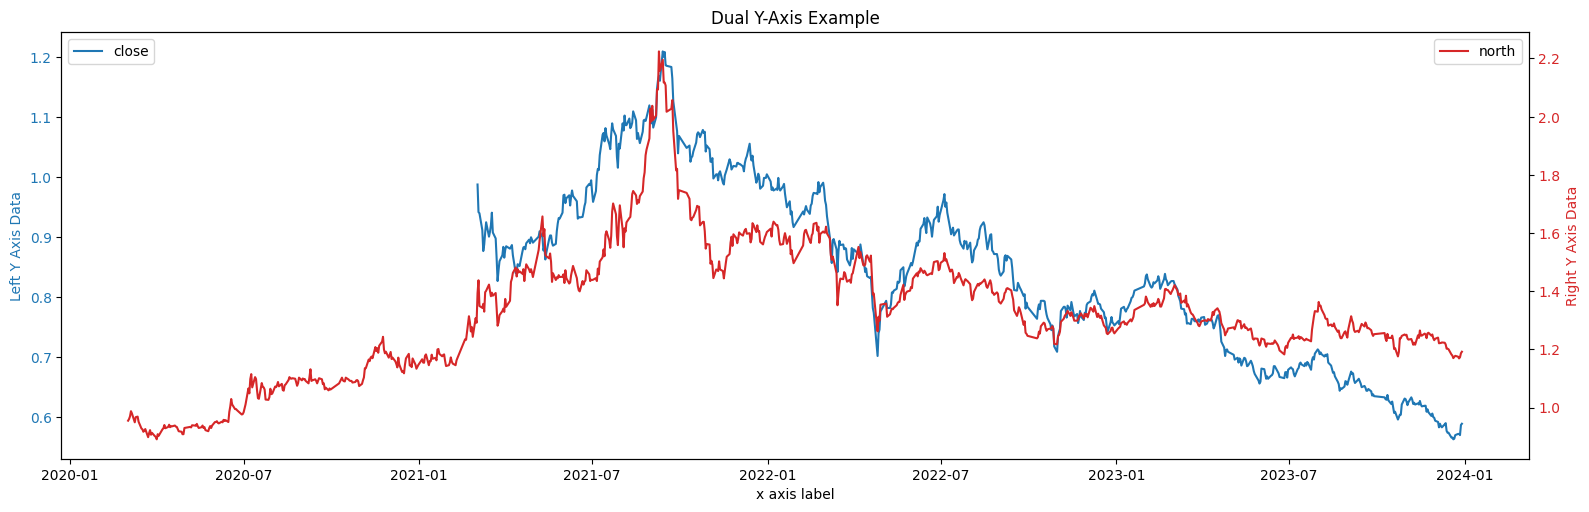

In [46]:
fig, ax1 = plt.subplots(figsize = (16,5))

color = 'tab:blue'
ax1.set_xlabel('x axis label')
ax1.set_ylabel('Left Y Axis Data', color=color)
ax1.plot(df_price_entry.index, df_price_entry['159870.XSHE'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Right Y Axis Data', color=color)
ax2.plot(df_price_entry.index,df_price_entry['515210.XSHG'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Dual Y-Axis Example')
ax1.legend(['close'], loc='upper left')
ax2.legend(['north'], loc='upper right')

<Axes: xlabel='date'>

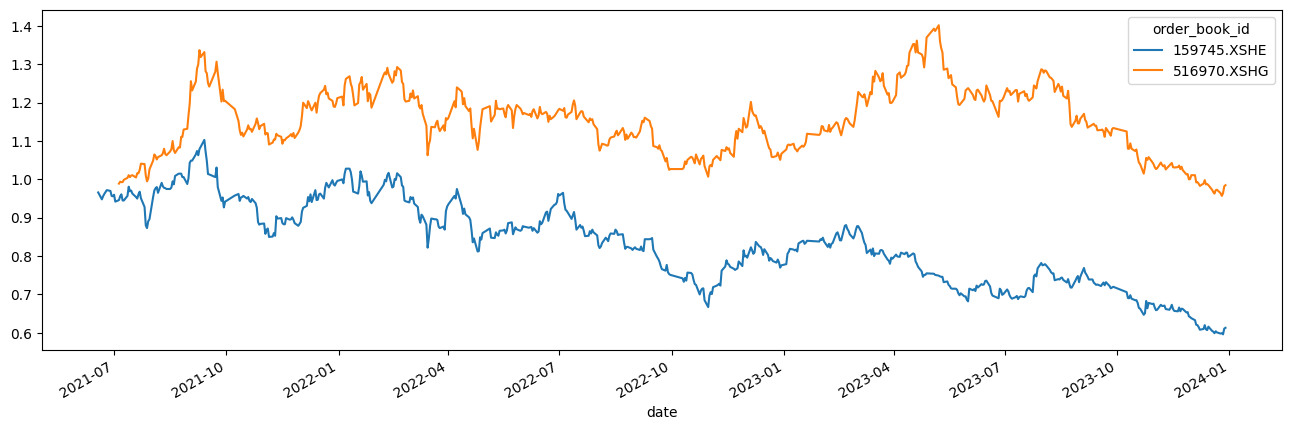

In [60]:
df_price_entry[['159745.XSHE', '516970.XSHG']].plot(figsize = (16,5))

In [42]:
corr_matrix = pct_chg.corr()
clusters = []
classified_etfs = set()

for i in range(len(corr_matrix.columns)):
    etf1 = corr_matrix.columns[i]
    if etf1 in classified_etfs:
        continue
    current_cluster = {etf1}
    for j in range(i+1, len(corr_matrix.columns)):
        etf2 = corr_matrix.columns[j]
        if corr_matrix.iloc[i, j] > 0.8:
            current_cluster.add(etf2)
            classified_etfs.add(etf2)
    if len(current_cluster) > 1:
        clusters.append(list(current_cluster))
        classified_etfs.update(current_cluster)
print(clusters)

[['159852.XSHE', '159998.XSHE'], ['516160.XSHG', '159958.XSHE'], ['512480.XSHG', '159997.XSHE', '515880.XSHG', '159998.XSHE']]


In [9]:
corr_matrix = pct_chg.corr()
clusters = []

for i in range(len(corr_matrix)):
    for j in range(i+1, len(corr_matrix)):
        if corr_matrix.iloc[i, j] > 0.9:
            found_cluster = False
            for cluster in clusters:
                if corr_matrix.index[i] in cluster or corr_matrix.columns[j] in cluster:
                    cluster.add(corr_matrix.index[i])
                    cluster.add(corr_matrix.columns[j])
                    found_cluster = True
                    break
            if not found_cluster:
                clusters.append({corr_matrix.index[i], corr_matrix.columns[j]})

merged_clusters = []
for cluster in clusters:
    new_cluster = set(cluster)
    for merged_cluster in merged_clusters:
        if not new_cluster.isdisjoint(merged_cluster):
            new_cluster |= merged_cluster
            merged_clusters.remove(merged_cluster)
            break
    merged_clusters.append(new_cluster)
cluster_list = [list(cluster) for cluster in merged_clusters]
print(cluster_list)

[['159852.XSHE', '159998.XSHE']]


In [22]:
etf_name_df = pd.read_excel('../ETF-研究/ETF_industry.xlsx')
etf_name_df['code2'] = [id_convert(code) for code in etf_name_df['code'].tolist()]
etf_name_df.set_index('code2', inplace=True)
cluster_correlations = []
cluster_names = []

for cluster in clusters:
    # 计算簇中 ETF 的平均相关性
    cluster_corr = pct_chg[cluster].corr().mean().mean()
    cluster_correlations.append(cluster_corr)
    # 获取簇中 ETF 的名称
    cluster_name = etf_name_df.loc[cluster, 'name'].tolist()
    cluster_names.append(cluster_name)

# 创建新的 DataFrame
result_df = pd.DataFrame({
    'ETF Correlations': cluster_correlations,
    'ETF Names': cluster_names
})
result_df

,ETF Correlations,ETF Names
0,0.944416,"[广发中证全指信息技术ETF, 国联安中证全指半导体ETF, 国泰中证全指集成电路ETF]"
1,0.965967,"[博时中证全指电力公用事业ETF, 华泰柏瑞中证全指电力公用事业ETF, 广发中证全指电力公..."
2,0.969031,"[华夏中证全指运输ETF, 南方国证交通运输行业ETF]"
3,0.960300,"[华安中证申万食品饮料ETF, 汇添富中证主要消费ETF, 博时中证主要消费ETF, 南方中..."
4,0.979370,"[南方中证全指房地产ETF, 华宝中证800地产ETF, 华夏中证全指房地产ETF]"
5,0.955552,"[汇添富中证全指医疗器械ETF, 招商中证全指医疗器械ETF, 广发中证全指医药卫生ETF,..."
6,0.986376,"[建信中证全指证券公司ETF, 华夏中证全指证券公司ETF, 富国中证全指证券公司ETF, ..."
7,0.961517,"[鹏华中证银行ETF, 华宝中证银行ETF, 富国中证银行ETF, 华安中证银行ETF, 天..."
8,0.939823,"[汇添富中证医药卫生ETF, 易方达沪深300医药卫生ETF, 招商中证沪港深500医药卫生..."
9,0.944045,"[广发中证全指能源ETF, 汇添富中证能源ETF, 国泰中证煤炭ETF]"


In [24]:
result_df.to_csv('相关性.csv')

2019-01-14 00:00:00: 买入 512880.XSHG, 价格 0.777, 数量 6400
2019-01-14 00:00:00: 买入 512980.XSHG, 价格 0.669, 数量 7500
2019-01-31 10:30:00: 卖出 512980.XSHG, 价格 0.647, 数量 7500
2019-02-15 15:00:00: 卖出 512880.XSHG, 价格 0.82, 数量 6400
2019-02-18 00:00:00: 买入 512800.XSHG, 价格 0.977, 数量 5100
2019-02-26 11:30:00: 卖出 512800.XSHG, 价格 1.034, 数量 5100
2019-03-11 00:00:00: 买入 512800.XSHG, 价格 1.025, 数量 5000
2019-03-11 00:00:00: 买入 159928.XSHE, 价格 0.5795, 数量 9100
2019-03-19 10:30:00: 卖出 159928.XSHE, 价格 0.6178, 数量 9100
2019-03-25 00:00:00: 买入 512010.XSHG, 价格 0.408, 数量 13700
2019-04-02 10:30:00: 卖出 512010.XSHG, 价格 0.4312, 数量 13700
2019-04-08 00:00:00: 买入 512010.XSHG, 价格 0.4295, 数量 13800
2019-04-09 10:30:00: 卖出 512800.XSHG, 价格 1.082, 数量 5000
2019-04-15 00:00:00: 买入 512800.XSHG, 价格 1.0759999999999998, 数量 5000
2019-04-26 10:30:00: 卖出 512010.XSHG, 价格 0.4152, 数量 13800
2019-04-29 00:00:00: 买入 159928.XSHE, 价格 0.686, 数量 8400
2019-05-06 11:30:00: 卖出 512800.XSHG, 价格 1.0390000000000001, 数量 5000
2019-05-06 11:30:00: 卖出 159928.

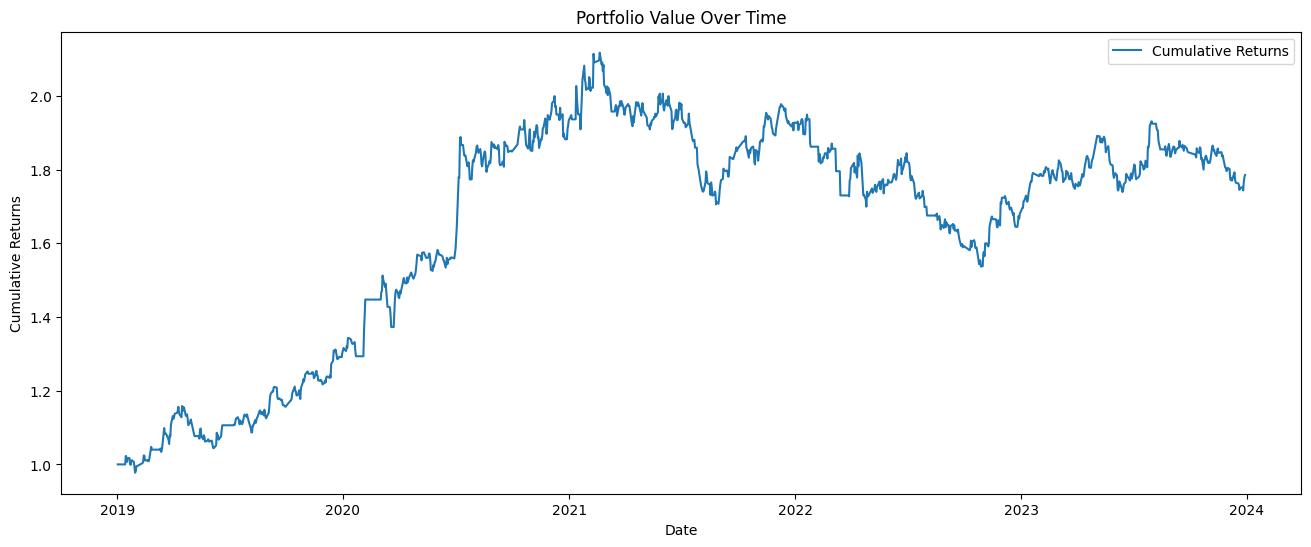

初始资金: 10000
最终资金: 17855.509999999987
年化收益率: 12.68%
最大回撤: -27.41%
未考虑无风险利率的夏普比率: 0.79
交易次数: 272


In [120]:
initial_capital = 10000
positions = 4
slippage_and_fees = 0.00
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital
etf_value = 0
holdings = {}
peak = {}
stop_loss_point = {}
take_profit_point = {}
entry_price = {}

def calculate_slope(price_data):
    price_data = price_data.replace([np.inf, -np.inf], np.nan).dropna()
    if len(price_data) < 2:
        return np.nan
    return np.polyfit(range(len(price_data)), price_data, 1)[0]

def check_buy_signals(df, date):
    etf_volatilities = {}
    etf_slopes = {}
    for etf in df.columns:
        price_data = df[etf].loc[:date].iloc[-5:]
        if price_data.count() < 5:
            continue
        volatility = price_data.pct_change().std()
        slope = calculate_slope(price_data)
        etf_volatilities[etf] = volatility
        etf_slopes[etf] = slope

    etfs_with_positive_slope = {etf: returns for etf, returns in etf_volatilities.items() if etf_slopes[etf] < 0}
    selected_etfs = sorted(etfs_with_positive_slope, key=etfs_with_positive_slope.get)[:2]
    return selected_etfs


def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings.get(etf, 0) == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price 
            entry_price[etf] = price 
            stop_loss_point[etf] = price * 0.99
            take_profit_point[etf] = price * 1.02
        
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price):
    if holdings.get(etf, 0) <= 0:
        return False
    if price < stop_loss_point.get(etf, 0):
        return True
    if price >= take_profit_point.get(etf, 0):
        stop_loss_point[etf] = take_profit_point[etf]
        take_profit_point[etf] = entry_price[etf] * (1 + 0.01 * (int((price / entry_price[etf] - 1) / 0.01) + 1))
    return False

def sell(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings.get(etf, 0) > 0:
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count += 1

start_date = pd.to_datetime('2014-01-02')
last_rebalance_date = start_date
trading_hours = ['10:30', '11:30', '14:00', '15:00']
count = 0

for date, prices_daily in df_price_entry.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    # 检查是否到了每周的调仓日（周一）且自上次买入以来至少过去了一周
    if date.weekday() == 0 and date > last_rebalance_date:
        selected_etfs = check_buy_signals(df_price_entry, date)
        for etf in selected_etfs:
            if etf in prices_daily and not np.isnan(prices_daily[etf]):
                buy(etf, prices_daily[etf], date)
        last_buy_date = date  # 更新上次买入日期
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]
            for etf in holdings.keys():  # 遍历当前持有的ETF
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    if check_stop_conditions(etf, price_hourly):
                        sell(etf, price_hourly, datetime_index)
    
    # for etf in selected_etfs:
    #     if etf in prices_daily and not np.isnan(prices_daily[etf]):
    #         buy(etf, prices_daily[etf], date)
    
    etf_value = sum(holdings.get(etf, 0) * prices_daily.get(etf, 0) for etf in holdings if holdings.get(etf, 0) > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df_price_entry.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")

In [121]:
n1 = portfolio_values

In [35]:
df = get_price(symbol, start, end, frequency)[['open','high','low','close']]
df['previous_close'] = df.groupby(level=0)['close'].shift(1)
df['tr0'] = df['high'] - df['low']
df['tr1'] = (df['high'] - df['previous_close']).abs()
df['tr2'] = (df['low'] - df['previous_close']).abs()
df['tr'] = df[['tr0', 'tr1', 'tr2']].max(axis=1)
df_atr = df.groupby(level=0)['tr'].rolling(window=14).mean().droplevel(0)
df_atr = df_atr.unstack(level=0)

#### 截面收益

{}
{'159930.XSHE': 0.003452743121258761, '513050.XSHG': 0.004284537715847858}
2019-01-14 00:00:00: 买入 159930.XSHE, 价格 0.6579999999999999, 数量 7500
2019-01-14 00:00:00: 买入 513050.XSHG, 价格 1.094, 数量 4600
2019-01-17 14:00:00: 卖出 159930.XSHE, 价格 0.67, 数量 7500
2019-01-17 15:00:00: 卖出 513050.XSHG, 价格 1.109, 数量 4600
{'159930.XSHE': 0.009368878807936742, '512200.XSHG': 0.0017451661045630174, '512400.XSHG': 0.0030658015581974674, '513050.XSHG': 0.008067498670021683}
2019-01-21 00:00:00: 买入 513050.XSHG, 价格 1.143, 数量 4400
2019-01-21 00:00:00: 买入 159930.XSHE, 价格 0.6829999999999999, 数量 7500
2019-01-21 10:30:00: 卖出 159930.XSHE, 价格 0.6759999999999999, 数量 7500
2019-01-22 15:00:00: 卖出 513050.XSHG, 价格 1.13, 数量 4400
{'159930.XSHE': 0.0007523394342969225, '512200.XSHG': 0.004107758858131416, '513050.XSHG': 0.004283759940954229}
2019-01-28 00:00:00: 买入 512200.XSHG, 价格 0.74, 数量 6700
2019-01-28 00:00:00: 买入 513050.XSHG, 价格 1.149, 数量 4400
2019-01-28 14:00:00: 卖出 512200.XSHG, 价格 0.727, 数量 6700
{'159930.XSHE': 0

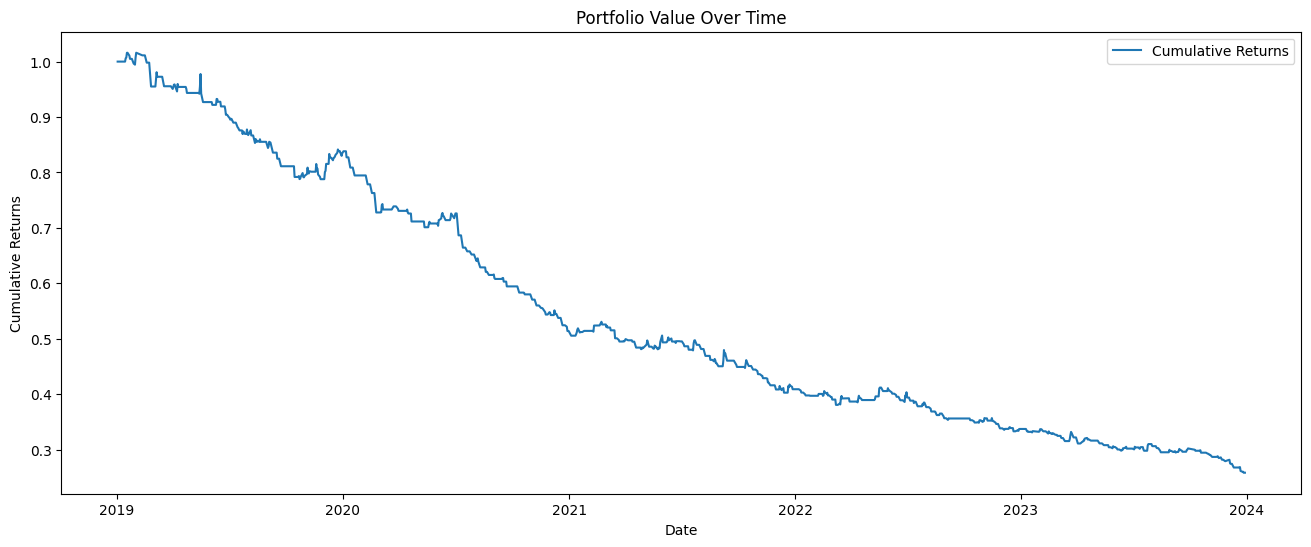

初始资金: 10000
最终资金: 2583.9499999999884
年化收益率: -24.32%
最大回撤: -74.57%
未考虑无风险利率的夏普比率: -2.07
交易次数: 744


In [26]:
initial_capital = 10000
positions = 2
slippage_and_fees = 0.00
portfolio_value_tracker = []

capital = initial_capital
cash = initial_capital
etf_value = 0
holdings = {}
peak = {}
stop_loss_point = {}
take_profit_point = {}
entry_price = {}

def calculate_slope(price_data):
    price_data = price_data.replace([np.inf, -np.inf], np.nan).dropna()
    if len(price_data) < 2:
        return np.nan
    return np.polyfit(range(len(price_data)), price_data, 1)[0]

def check_buy_signals(df, date):
    etf_average_returns = {}
    etf_slopes = {}
    for etf in df.columns:
        price_data = df[etf].loc[:date].iloc[-5:]
        if price_data.count() < 5:
            continue
        daily_returns = price_data.pct_change().dropna() 
        average_return = daily_returns.mean() 
        slope = calculate_slope(price_data)
        etf_average_returns[etf] = average_return
        etf_slopes[etf] = slope

    etfs_with_positive_slope = {etf: avg_ret for etf, avg_ret in etf_average_returns.items() if etf_slopes[etf] > 0}
    selected_etfs = sorted(etfs_with_positive_slope, key=etfs_with_positive_slope.get)[-2:]
    print(etfs_with_positive_slope)
    return selected_etfs


def buy(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings.get(etf, 0) == 0:
        num_held_etfs = sum(1 for h in holdings.values() if h > 0)
        if num_held_etfs < positions:
            investable_cash = cash / (positions - num_held_etfs)
            etf_amount = int(investable_cash * (1 - slippage_and_fees) / price) // 100 * 100
            holdings[etf] = etf_amount
            cash -= etf_amount * price 
            entry_price[etf] = price 
            stop_loss_point[etf] = price * 0.99
            take_profit_point[etf] = price * 1.02
        
            print(f"{date}: 买入 {etf}, 价格 {price}, 数量 {etf_amount}")
            count += 1

def check_stop_conditions(etf, price):
    if holdings.get(etf, 0) <= 0:
        return False
    if price < stop_loss_point.get(etf, 0):
        return True
    if price >= take_profit_point.get(etf, 0):
        stop_loss_point[etf] = take_profit_point[etf]
        take_profit_point[etf] = entry_price[etf] * (1 + 0.01 * (int((price / entry_price[etf] - 1) / 0.01) + 1))
    return False

def sell(etf, price, date):
    global capital, cash, etf_value, holdings, count
    if not np.isnan(price) and holdings.get(etf, 0) > 0:
        proceeds = holdings[etf] * price * (1 - slippage_and_fees)
        cash += proceeds 
        etf_value -= holdings[etf] * price
        print(f"{date}: 卖出 {etf}, 价格 {price}, 数量 {holdings[etf]}")
        holdings[etf] = 0
        count += 1

start_date = pd.to_datetime('2019-01-02')
last_rebalance_date = start_date
trading_hours = ['10:30', '11:30', '14:00', '15:00']
count = 0

for date, prices_daily in df_price_entry.iterrows():
    date_str = date.strftime('%Y-%m-%d')
    # 检查是否到了每周的调仓日（周一）且自上次买入以来至少过去了一周
    if date.weekday() == 0 and date > last_rebalance_date:
        selected_etfs = check_buy_signals(df_price_entry, date)
        for etf in selected_etfs:
            if etf in prices_daily and not np.isnan(prices_daily[etf]):
                buy(etf, prices_daily[etf], date)
        last_buy_date = date  # 更新上次买入日期
    for trading_hour in trading_hours:
        datetime_str = f"{date_str} {trading_hour}"
        datetime_index = pd.to_datetime(datetime_str)
        if datetime_index in df_price_exit.index:
            prices_hourly = df_price_exit.loc[datetime_index]
            for etf in holdings.keys():  # 遍历当前持有的ETF
                if etf in prices_hourly and not np.isnan(prices_hourly[etf]):
                    price_hourly = prices_hourly[etf]
                    if check_stop_conditions(etf, price_hourly):
                        sell(etf, price_hourly, datetime_index)
    
    etf_value = sum(holdings.get(etf, 0) * prices_daily.get(etf, 0) for etf in holdings if holdings.get(etf, 0) > 0)
    capital = cash + etf_value
    portfolio_value_tracker.append(capital)

portfolio_values = np.array(portfolio_value_tracker)
returns = portfolio_values[1:] / portfolio_values[:-1] - 1
cumulative_returns = portfolio_values / initial_capital - 1

annualized_return = (portfolio_values[-1] / portfolio_values[0])**(250/len(portfolio_values))-1
rolling_max = np.maximum.accumulate(portfolio_values)
daily_drawdown = portfolio_values / rolling_max - 1
max_drawdown = np.min(daily_drawdown)

average_daily_return = np.mean(returns)
annualized_dev = np.std(returns) * np.sqrt(252)
sharp_ratio = annualized_return / annualized_dev

plt.figure(figsize=(16, 6))
plt.plot(df_price_entry.index, portfolio_values/10000, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

print(f"初始资金: {initial_capital}")
print(f"最终资金: {portfolio_values[-1]}")
print(f"年化收益率: {annualized_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"未考虑无风险利率的夏普比率: {sharp_ratio:.2f}")
print(f"交易次数: {count}")